<a href="https://colab.research.google.com/github/pradeep2310/PyTorch/blob/main/Neural_network_pytorch_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import helper
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formate = 'retina'

In [ ]:
from six.moves import urllib
opener= urllib.request.build_opener()
opener.addheaders= [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [ ]:
from torchvision import datasets, transforms

#noramlize the dataset
transform= transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5),(0.5)),])

#load dataset
trainset= datasets.MNIST('~/.pytorch/MNIST_data/', download= True, train=True, transform=transform)
trainloader= torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [ ]:
dataiter = iter(trainloader)
images, lables = next(dataiter)
print(type(images))
print(images.shape)
print(lables.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


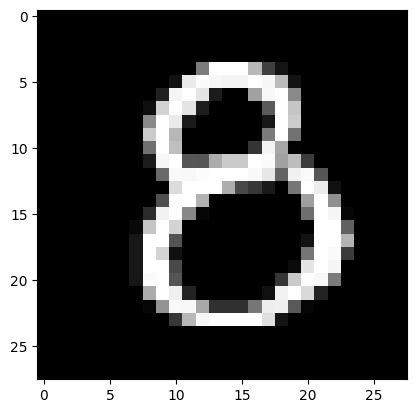

In [ ]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

Building network with pytorch

In [ ]:
from torch import nn

In [ ]:
class net(nn.Module):
  def __init__(self):
    super().__init__()
    self.h = nn.Linear(784,256)    #hidden layer
    self.o = nn.Linear(256,10)     #output layer, 10 units- one for each digit

    self.sigmoid = nn.Sigmoid()    # activation
    self.softmax = nn.Softmax(dim=1)  #softmax output

  def forward(self,x):
    x=self.h(x)
    x=self.sigmoid(x)
    x=self.o(x)
    x=self.softmax(x)
    return x

In [ ]:
model=net()
model

net(
  (h): Linear(in_features=784, out_features=256, bias=True)
  (o): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [ ]:
import torch.nn.functional as F

class net1(nn.Module):
  def __init__(self):
    super().__init__()
    self.h = nn.Linear(784,256)
    self.o = nn.Linear(256,10)

  def forward(self,x):
    x = F.sigmoid(self.h(x))
    x= F.softmax(self.o(x), dim=1)
    return x

# **Example**

In [ ]:
class network(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784,128)
    self.fc2= nn.Linear(128,64)
    self.fc3= nn.Linear(64,10)

  def forward(self,x):
    x= F.relu(self.fc1(x))
    x= F.relu(self.fc2(x))
    x= F.softmax(self.fc3(x), dim=1)
    return x

In [ ]:
model=network()
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0328, -0.0227,  0.0013,  ..., -0.0044, -0.0082,  0.0024],
        [-0.0220, -0.0032,  0.0222,  ..., -0.0211,  0.0162,  0.0227],
        [ 0.0267,  0.0280,  0.0243,  ..., -0.0203, -0.0188,  0.0182],
        ...,
        [ 0.0021,  0.0323, -0.0268,  ...,  0.0070,  0.0188,  0.0094],
        [ 0.0088,  0.0118,  0.0240,  ...,  0.0162, -0.0091,  0.0045],
        [-0.0322, -0.0222,  0.0114,  ...,  0.0130, -0.0269,  0.0109]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0192, -0.0141,  0.0044, -0.0177, -0.0181, -0.0284, -0.0251, -0.0301,
        -0.0332,  0.0083, -0.0309, -0.0139,  0.0055,  0.0167, -0.0069,  0.0304,
        -0.0028,  0.0269, -0.0114, -0.0151, -0.0088, -0.0218, -0.0150, -0.0048,
         0.0290,  0.0169, -0.0185, -0.0178, -0.0012,  0.0105, -0.0118, -0.0112,
        -0.0064, -0.0116, -0.0098,  0.0283,  0.0239,  0.0202,  0.0112,  0.0087,
         0.0010, -0.0252,  0.0213, -0.0169, -0.0211, -0.0242, -0.0137,  0.0277,
        -0.0277

In [ ]:
model.fc1.bias.data.fill_(0)
model.fc1.bias

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [ ]:
model.fc1.weight.data.normal_(std=0.01)
model.fc1.weight

Parameter containing:
tensor([[-0.0089, -0.0093, -0.0047,  ...,  0.0052, -0.0019,  0.0081],
        [ 0.0018,  0.0034,  0.0001,  ..., -0.0042,  0.0047,  0.0196],
        [-0.0005,  0.0013, -0.0018,  ..., -0.0002,  0.0138, -0.0006],
        ...,
        [-0.0110,  0.0136, -0.0057,  ..., -0.0104, -0.0036,  0.0051],
        [-0.0020, -0.0172,  0.0015,  ...,  0.0084,  0.0149, -0.0140],
        [ 0.0081,  0.0057,  0.0028,  ..., -0.0065,  0.0082,  0.0136]],
       requires_grad=True)

pass in an image

In [ ]:
# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels)
images.resize_(64, 1, 784)
images.shape

torch.Size([64, 1, 784])

In [ ]:
# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
# helper.view_classify(img.view(1, 28, 28), ps)

Using nn.Sequential

In [ ]:
model= nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.Softmax(dim=1))

In [ ]:
# Forward pass through the network and display output
images, labels = next(iter(trainloader))
print(images.shape)
images.resize_(64, 1, 784)
print(images.shape)
ps = model.forward(images[0,:])
print(ps)
# helper.view_classify(images[0].view(1, 28, 28), ps)

torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 784])
tensor([[0.1088, 0.0996, 0.0960, 0.0943, 0.0950, 0.1082, 0.0943, 0.1194, 0.0960,
         0.0883]], grad_fn=<SoftmaxBackward0>)


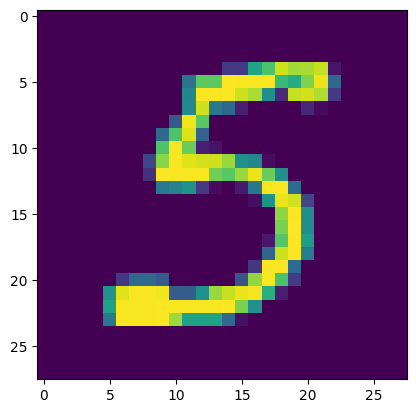

In [ ]:
plt.imshow(images[0].reshape(28,28))

In [ ]:
ps.argmax()

tensor(7)